## Introduction
We are analyzing which neighborhood is (subjectively) "best". I have chosen tax delinquency as my metric. I personally would have chosen distance to "fresh" food, but I could not find a dataset for that. I chose my metric because those who are paying their property taxes both know how to pay their taxes and are capable of doing so.

## Metric
My metric is tax delinquency. I am only looking at current tax deliquency. I am using a dataset for tax deliquency.

## Best Neighborhood
I looked through all the neighborhoods, and have graphs of both average deliquency per house in the neighborhood, and total deliquency. I have included a total graph to show what "most" neighborhoods look like. Every neighborhood in the first two graphs is a pretty good choice, but Homewood North is particularly good, as it has a low average and has a decent amount of total entries.

## Conclusion
I don't know any neighborhoods in Pittsburgh unfortunately. I have not seen any tax data from elsewhere either, so I don't know how (un)usual this data is.

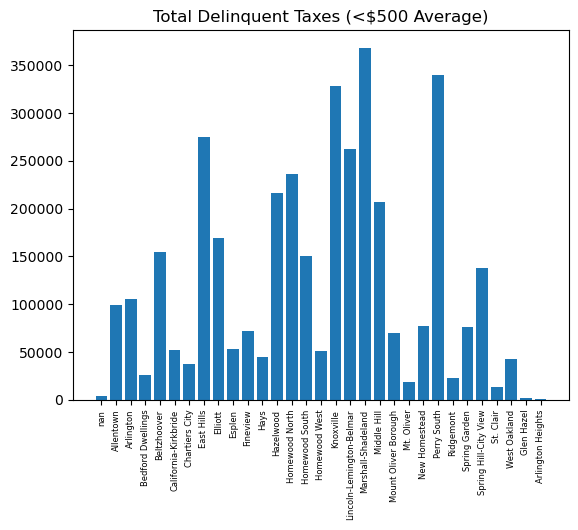

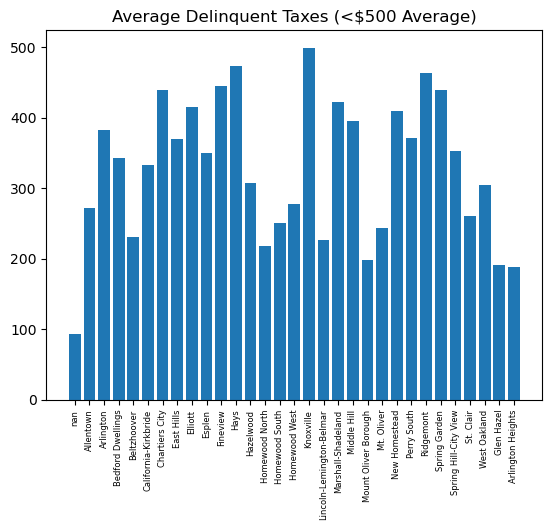

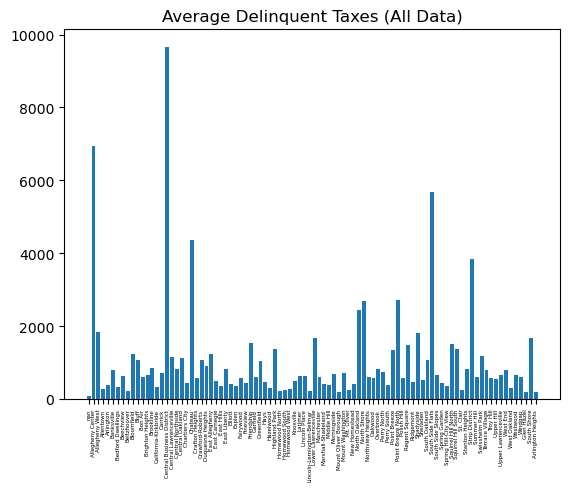

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

taxes = pd.read_csv("tax-deliquency.tsv", sep="\t")

data = {}
#stored as name: [total deliquency, number of entries]

for i in range(len(taxes)):
    current_nh = str(taxes["neighborhood"][i])
    current_tax = float(taxes["current_delq_tax"][i])
    
    if current_nh in data:
        data[current_nh][0]+=current_tax
        data[current_nh][1]+=1
    else:
        data[current_nh]=[current_tax, 1]

nh_names = list(data.keys())
nh_taxes = data.values()

nh_total_taxes = []
nh_avg_taxes = []

for total, count in nh_taxes:
    nh_total_taxes.append(total)
    nh_avg_taxes.append(total/count)

#only show lower values (<500 avg)
nh_names1,nh_total_taxes1,nh_avg_taxes1=[],[],[]
for i in range(len(nh_names)):
    if(nh_avg_taxes[i]<500):
        nh_names1.append(nh_names[i])
        nh_total_taxes1.append(nh_total_taxes[i])
        nh_avg_taxes1.append(nh_avg_taxes[i])


plt.figure()
plt.xticks(fontsize=6)
plt.bar(nh_names1, nh_total_taxes1)
plt.title("Total Delinquent Taxes (<$500 Average)")
plt.xticks(rotation=90)

plt.figure()
plt.xticks(fontsize=6)
plt.bar(nh_names1, nh_avg_taxes1)
plt.title("Average Delinquent Taxes (<$500 Average)")
plt.xticks(rotation=90)

plt.figure()
plt.xticks(fontsize=4)
plt.bar(nh_names,nh_avg_taxes)
plt.title("Average Delinquent Taxes (All Data)")
plt.xticks(rotation=90)

plt.show()